In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import trapezoid, solve_ivp

<p align="center">
  <img src="https://github.com/marcus-valmeida/Projeto-conversao/blob/vn/circuito_exercicio1.png?raw=true" alt="Circuito Exercício 1" width="500"/>
</p>

In [3]:
#Dados da questão
r   = 30*1e-2
N1  = 1000
U0  = 4*np.pi*1e-7
Lc  = 140*1e-2
Ac  = np.pi * (r**2)

num_pontos = 200

Massa = 10  # massa de 10Kg

#caso real
CampoMagnetico = np.array([0, 68, 135, 203, 271, 338, 406, 474, 542, 609, 1100, 1500, 2500, 4000, 5000, 9000, 12000, 20000, 25000])
DensidadeCampo = np.array([0, 0.733, 1.205, 1.424, 1.517, 1.560, 1.588, 1.617, 1.631, 1.646, 1.689, 1.703,1.724, 1.731, 1.738, 1.761, 1.770, 1.800, 1.816])

#caso linear
CampoMagnetico_linear = np.array([0, 68])
DensidadeCampo_linear = np.array([0, 0.733])

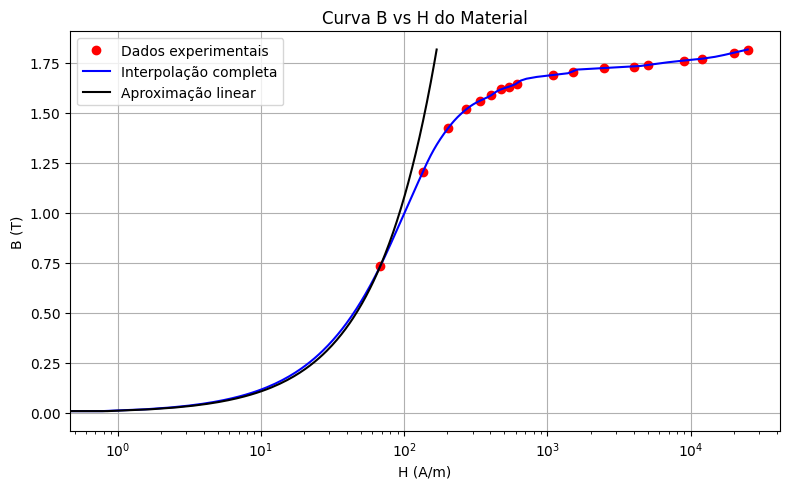

In [4]:
# Interpolação cúbica (ordem crescente de B)
f_real = CubicSpline(DensidadeCampo, CampoMagnetico, bc_type='natural')
f_linear = CubicSpline(DensidadeCampo_linear, CampoMagnetico_linear, bc_type='natural')

# Geração de pontos para interpolação
B_a = np.linspace(min(DensidadeCampo), max(DensidadeCampo), num_pontos)
H_a = f_real(B_a)
H_linear_a = f_linear(B_a)

# Plotagem
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(CampoMagnetico, DensidadeCampo, 'ro', label='Dados experimentais')
ax.plot(H_a, B_a, 'b-', label='Interpolação completa')
ax.plot(H_linear_a, B_a, 'k-', label='Aproximação linear')

ax.set_title('Curva B vs H do Material')
ax.set_xlabel('H (A/m)')
ax.set_ylabel('B (T)')
ax.set_xscale('log')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

#### Em todos os exercícios a seguir considere que o sistema é alimentado por uma fonte ideal de corrente constante.

- Determine X de modo que área útil para passagem de fluxo magnético nas paredes mais externas
seja a mesma que na coluna central.

- Considerando uma corrente aplicada na bobina de 1 A, apresente um gráfico para a força
magnética que surge no sistema em função do comprimento do entreferro nas condições a
seguir:

In [5]:
'''
Área1 = π * 0.30²
Área2 = (π * X²) - π*(X-0.10)²
Área1 = Área2 =π * 0.30² = (π * X²) - π*(X-0.10)²
assim obtemos que :
X = 0.50
'''

In [6]:
def Coenergia_forca(Interpolacao_H_B, corrente):
    # variação de g, no intreferro
    g = np.linspace(0.005, 0.05, num_pontos)# 5 mm em metros

    # variação de Bm
    Bm = np.linspace(0, float(np.max(DensidadeCampo)), num_pontos)
    # Corrente variavel para o fluxo com variação do entreferro -> Inicia um vetor com todos os valores nulos
    I_variavel = np.zeros(num_pontos)
    # Fluxo concatenado
    fluxo_concatenado = np.zeros(num_pontos)
    Coenergia = np.zeros(num_pontos)

    for j in range(len(g)):
      for b in range(len(Bm)):

        # If = (Hi*d + Bm*[x + g0]/U0) /Nf
        I_variavel[b] = ((Interpolacao_H_B(Bm[b])*Lc) + ((Bm[b]*(g[j])/U0)))/N1

        # λ =  Nf * Bm * Area_do_imã
        fluxo_concatenado[b] =  N1*Bm[b]*Ac

      # Interpolação de λ , Bm
      interpolacao_fluxo_concatenado_If = CubicSpline(I_variavel,fluxo_concatenado, bc_type='natural')

      #limite de integração do λ
      lim_int_fluxo_concatenado = np.linspace(0, corrente, num_pontos)
      #valores para coenergia
      interpol_fluxo_concatenado = interpolacao_fluxo_concatenado_If(lim_int_fluxo_concatenado)
      #valores para coenergia
      Coenergia[j] = trapezoid(interpol_fluxo_concatenado,lim_int_fluxo_concatenado)

    
    Forca = np.gradient(Coenergia, g)
    return Forca, Coenergia, g

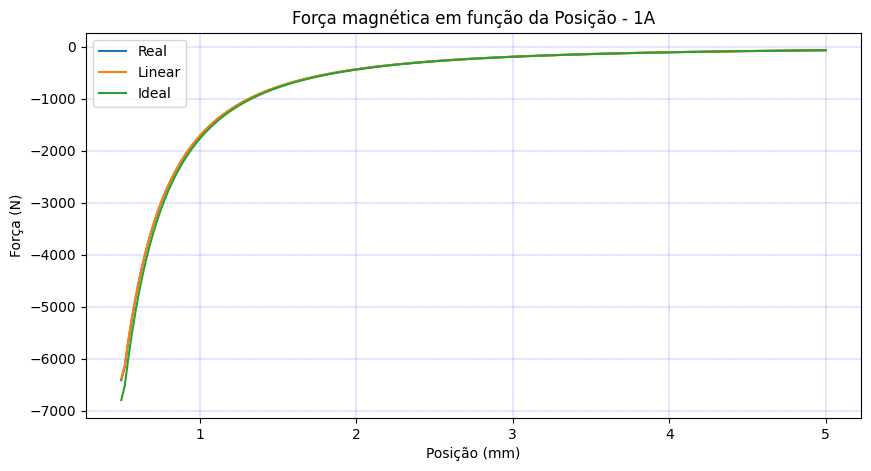

In [7]:
# ----- Cálculo -----
Forca_real, Co_energia_real, posicao        = Coenergia_forca(f_real, 1)
Forca_linear, Co_energia_linear, posicao    = Coenergia_forca(f_linear, 1)
Forca_ideal, Co_energia_ideal, posicao      = Coenergia_forca(lambda H: 0, 1)

# ----- Plot -----
plt.figure(figsize=[10,5])
plt.plot(posicao*100, Forca_real, label="Real")   
plt.plot(posicao*100, Forca_linear, label="Linear")
plt.plot(posicao*100, Forca_ideal, label="Ideal")
plt.xlabel("Posição (mm)")
plt.ylabel("Força (N)")
plt.title("Força magnética em função da Posição - 1A")
plt.legend()
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.2, color = 'blue')
plt.show()

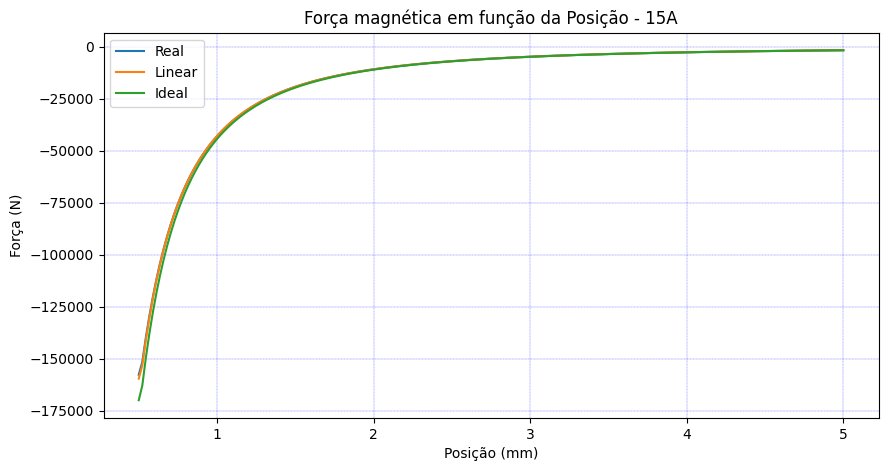

In [8]:
# ----- Cálculo -----
Forca_real, Co_energia_real, posicao        = Coenergia_forca(f_real, 5)
Forca_linear, Co_energia_linear, posicao    = Coenergia_forca(f_linear, 5)
Forca_ideal, Co_energia_ideal, posicao      = Coenergia_forca(lambda H: 0, 5)

# ----- Plot -----
plt.figure(figsize=[10,5])
plt.plot(posicao*100, Forca_real, label="Real")   
plt.plot(posicao*100, Forca_linear, label="Linear")
plt.plot(posicao*100, Forca_ideal, label="Ideal")
plt.xlabel("Posição (mm)")
plt.ylabel("Força (N)")
plt.title("Força magnética em função da Posição - 15A")
plt.legend()
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.2, color = 'blue')
plt.show()

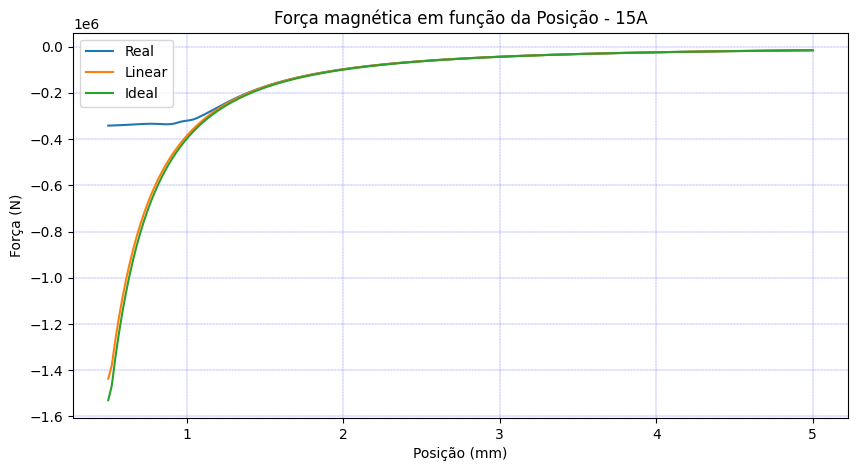

In [9]:
# ----- Cálculo -----
Forca_real, Co_energia_real, posicao        = Coenergia_forca(f_real, 15)
Forca_linear, Co_energia_linear, posicao    = Coenergia_forca(f_linear, 15)
Forca_ideal, Co_energia_ideal, posicao      = Coenergia_forca(lambda H: 0, 15)

# ----- Plot -----
plt.figure(figsize=[10,5])
plt.plot(posicao*100, Forca_real, label="Real")   
plt.plot(posicao*100, Forca_linear, label="Linear")
plt.plot(posicao*100, Forca_ideal, label="Ideal")
plt.xlabel("Posição (mm)")
plt.ylabel("Força (N)")
plt.title("Força magnética em função da Posição - 15A")
plt.legend()
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.2, color = 'blue')
plt.show()

- Considere que no instante inicial a placa móvel está parada e que temos uma distância entra a placa móvel o eletroímã de 5 cm. Considere ainda que, devido a rugosidade dos materiais, o espaçamento mínimo que pode haver entre os elementos do sistema é de 0,5 cm.

    - Considere que é aplicada uma corrente 80% do valor da maior corrente confiável. Apresente um gráfico da posição do elemento móvel em função do tempo.

In [11]:
#temos uma corrente confiável quando usamos o Hmax e Bmax

# If = (Hmax*Lc + Bmax*g0/U0)/N1
g_min = 0.5*1e-2 
I_confiavel = ((np.max(CampoMagnetico) * Lc) + (np.max(DensidadeCampo) * g_min)/U0)/N1

print(I_confiavel)

# 80% da corrente confiável
I_confiavel_80 = 0.8*I_confiavel
print(I_confiavel_80)

posicoes_vetor = np.linspace(0.005, 0.05, num_pontos) # Gerar pontos para interpolação da força

Forca_real, _, posicao = Coenergia_forca(f_real, I_confiavel_80)

forca_magnetica = CubicSpline(posicao, -np.abs(Forca_real))

42.22563441637205
33.78050753309764


In [32]:
# Calcule a força na posição inicial (0.05 m)
forca_inicial = np.abs(forca_magnetica(0.05)) 

print(f"Força Magnética no início (5 cm): {forca_inicial:.2f} N")
print(f"Força Peso a ser vencida: 98.10 N")

if forca_inicial > 98.1:
    print(">>> O eletroímã é forte o suficiente para iniciar o movimento.")
else:
    print(">>> O eletroímã é MUITO FRACO para levantar a placa.")

Força Magnética no início (5 cm): 80912.81 N
Força Peso a ser vencida: 98.10 N
>>> O eletroímã é forte o suficiente para iniciar o movimento.


In [ ]:
def sistema_dinamico_com_gravidade_CORRIGIDO(t, y, massa, funcao_forca):
    """
    Define a dinâmica para o MODELO VERTICAL com o sistema de coordenadas CORRETO.
    """
    posicao, velocidade = y
    
    # Previne que o solver tente calcular a força fora do intervalo de interpolação
    if posicao > g0 or posicao < g_min:
        posicao = np.clip(posicao, g_min, g0)
    
    # Força magnética (atrativa, para "cima", positiva)
    forca_magnetica_atual = np.abs(funcao_forca(posicao))
    
    # Força resultante é a magnética menos o peso
    forca_resultante = forca_magnetica_atual - (massa * 9.81)
    
    # Aceleração resultante
    aceleracao = forca_resultante / massa
    
    # Se por acaso a placa ultrapassar o ponto inicial, a velocidade deve ser zero
    # E a aceleração não pode ser negativa (não há nada empurrando para baixo além da gravidade)
    if forca_resultante < 0:
        aceleracao = 0 # Não acelera para cima
        
    # AQUI ESTÁ A CORREÇÃO CRUCIAL
    # A taxa de variação da POSIÇÃO (gap) é -velocidade.
    return [-velocidade, aceleracao]

In [14]:
def sistema_dinamico(t, y, massa, funcao_forca):
    """
    Define o sistema de EDOs para o solve_ivp.
    y[0] = posição (x)
    y[1] = velocidade (v)
    """
    posicao, velocidade = y

    v = velocidade
    a = forca_magnetica(posicao) / massa
    
    return [v, a]

In [30]:
def evento_parada(t, y, massa, funcao_forca):
    """
    Evento para parar a simulação quando a posição atinge o mínimo.
    """
    # y[0] é a posição. O evento ocorre quando esta função retorna 0.
    return y[0] - g_min

evento_parada.terminal = True  # Define que a simulação DEVE parar no evento.
evento_parada.direction = -1   # O evento só é válido quando a função está diminuindo (posição caindo para g_min).

Simulação concluída com sucesso. O tempo final foi 0.0028 segundos.


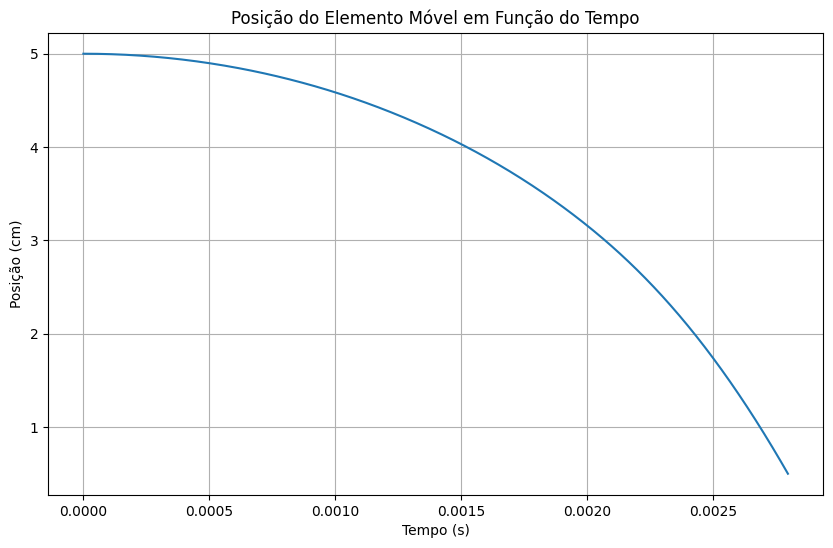

In [31]:
# --- CONDIÇÕES INICIAIS ---
x_inicial = 0.05  # 5 cm
v_inicial = 0.0
y0 = [x_inicial, v_inicial]

# --- PARÂMETROS DA SIMULAÇÃO ---
t_inicial = 0
t_final_estimado = 0.01  # 10 milissegundos é mais que suficiente
t_span = [t_inicial, t_final_estimado]

# --- RESOLVENDO A EDO COM A FUNÇÃO CORRIGIDA ---
solucao = solve_ivp(
    fun=sistema_dinamico_com_gravidade_CORRIGIDO,  # <<< Use a função corrigida
    t_span=t_span,
    y0=y0,
    method='RK45', 
    dense_output=True,
    events=evento_parada,
    args=(Massa, forca_magnetica)
)

# --- EXTRAINDO E PLOTANDO OS RESULTADOS ---
if solucao.status == 1: # O status 1 significa que o evento terminal foi alcançado
    print(f"Simulação concluída com sucesso. O tempo final foi {solucao.t_events[0][0]:.4f} segundos.")
    
    # Para um gráfico suave, crie pontos de tempo usando o resultado denso
    t_plot = np.linspace(solucao.t[0], solucao.t[-1], 500)
    posicao_plot = solucao.sol(t_plot)[0] # sol.sol() é a função de interpolação do resultado
    
    plt.figure(figsize=(10, 6))
    plt.plot(t_plot, posicao_plot * 100) # Convertendo para cm para visualização
    plt.title("Posição do Elemento Móvel em Função do Tempo")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Posição (cm)")
    plt.grid(True)
    plt.show()

elif solucao.status == 0:
    print("Simulação concluída porque o tempo final foi atingido, mas o evento de parada não ocorreu.")
else:
    print(f"A solução falhou com o status: {solucao.status}")

Placa atingiu a posição final em 0.0626 segundos.


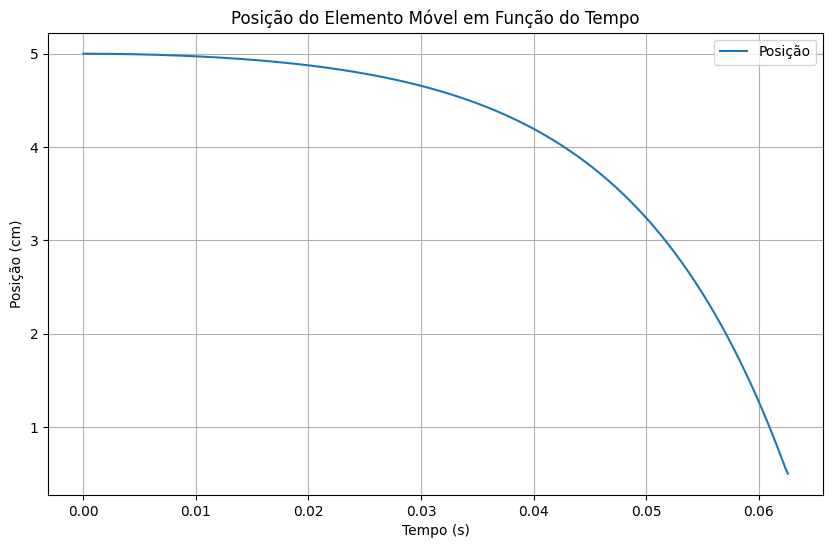

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d # Usando a interpolação do Amigo 2 como exemplo

# --- PRÉ-REQUISITOS (Assumindo que você já tem isso do seu código anterior) ---

# Suponha que você já calculou a Força vs. Posição para a corrente de operação
# e tem os vetores: `posicao_vetor` e `Forca_real`
# Lembre-se que Forca_real deve ser o valor absoluto da força de atração.
# Exemplo de dados:
num_pontos = 200
Massa = 10.0
g0 = 0.05
g_min = 0.005
posicao_vetor = np.linspace(g_min, g0, num_pontos) # Posições de 0.5cm a 5cm
# Força REAL calculada para cada ponto em `posicao_vetor` para I_op = 33.78 A
# ATENÇÃO: Os valores de Forca_real aqui são apenas um EXEMPLO. Use os seus valores reais.
Forca_real = np.linspace(2500, 150, num_pontos) 

# --- FIM DOS PRÉ-REQUISITOS ---


# Crie a função de interpolação da força, como seu Amigo 2 fez.
# Ela nos dará o valor da força para qualquer posição 'g'.
# A força aqui é o valor absoluto (positivo).
funcao_forca_interp = interp1d(posicao_vetor, Forca_real, kind='linear',
                               bounds_error=False,
                               fill_value=(Forca_real[0], Forca_real[-1]))

# --- A SOLUÇÃO: UMA ÚNICA FUNÇÃO DE SIMULAÇÃO ---

def simular_movimento(dt=2e-4, tmax=2.0):
    """
    Simula o movimento da placa usando o método de integração no tempo (Euler-Cromer).
    Calcula cada parte (força, aceleração, velocidade, posição) individualmente dentro do loop.
    """
    # 1. Inicialização
    t_vetor = np.arange(0, tmax, dt)
    g_vetor = np.zeros_like(t_vetor)  # Vetor de posições (gap)
    v_vetor = np.zeros_like(t_vetor)  # Vetor de velocidades
    
    g_vetor[0] = g0  # Posição inicial
    v_vetor[0] = 0.0   # Velocidade inicial
    
    # 2. Loop de Simulação no Tempo
    for k in range(1, len(t_vetor)):
        
        # --- Cálculo das partes individuais ---
        
        # Passo A: Calcular a força na posição anterior (g[k-1])
        forca_magnetica_atual = float(funcao_forca_interp(g_vetor[k-1]))
        
        # Passo B: Calcular a força líquida e a aceleração
        # (usando o modelo vertical do seu professor)
        forca_liquida = forca_magnetica_atual - (Massa * 9.81)
        aceleracao = forca_liquida / Massa
        
        # Se a força não for suficiente para levantar, a aceleração é zero.
        if forca_liquida < 0:
            aceleracao = 0

        # Passo C: Atualizar a velocidade (Método de Euler)
        v_vetor[k] = v_vetor[k-1] + aceleracao * dt
        
        # Passo D: Atualizar a posição (usando a nova velocidade - Euler-Cromer)
        # O sinal de menos é porque uma velocidade positiva (para cima) diminui o gap 'g'
        g_vetor[k] = g_vetor[k-1] - v_vetor[k] * dt
        
        # Passo E: Verificar condição de parada
        if g_vetor[k] <= g_min:
            g_vetor[k] = g_min  # Trava na posição final
            
            # Redimensiona os vetores para o tamanho exato até a batida
            t_vetor = t_vetor[:k+1]
            g_vetor = g_vetor[:k+1]
            v_vetor = v_vetor[:k+1]
            print(f"Placa atingiu a posição final em {t_vetor[-1]:.4f} segundos.")
            break
            
    return t_vetor, g_vetor, v_vetor

# --- EXECUÇÃO E PLOTAGEM ---

# Chame a função para rodar a simulação
tempo_final, posicao_final, velocidade_final = simular_movimento()

# Plotar o gráfico de Posição vs. Tempo
plt.figure(figsize=[10, 6])
plt.plot(tempo_final, posicao_final * 100, label="Posição")
plt.xlabel("Tempo (s)")
plt.ylabel("Posição (cm)")
plt.title("Posição do Elemento Móvel em Função do Tempo")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\mateu\AppData\Local\Temp\ipykernel_19264\237246055.py:24: RuntimeWarning: divide by zero encountered in divide
  integrando_tempo = 1 / velocidade_vs_posicao[1:]


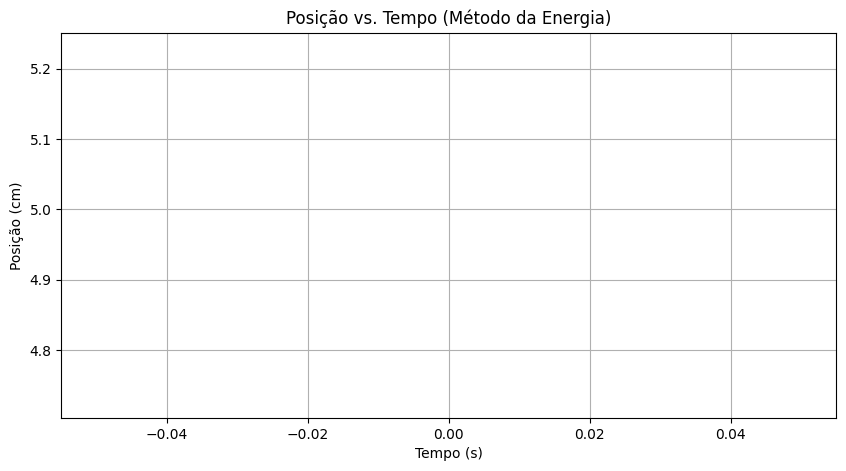

In [25]:
from scipy.integrate import cumulative_trapezoid
g0 = 0.05       # m (5 cm)
g_min = 0.005   # m (0,5 cm)
# 1. Defina o vetor de posições
posicoes = np.linspace(g0, g_min, num_pontos)

# 2. Calcule a força líquida para cada posição
forca_mag_nos_pontos = np.abs(forca_magnetica(posicoes)) # Força magnética é positiva (para cima)
forca_liq_nos_pontos = forca_mag_nos_pontos - (Massa * 9.81)   # Subtrai o peso

# 3. Calcule o Trabalho integrando a Força Líquida pela Posição
# O trabalho é a integral de F dx. O movimento é de g0 para g_min (dx é negativo)
# Usamos cumulative_trapezoid para obter o trabalho acumulado em cada ponto.
trabalho_acumulado = cumulative_trapezoid(forca_liq_nos_pontos, posicoes, initial=0)

# 4. Calcule a Velocidade usando o Teorema do Trabalho-Energia (W = 1/2*m*v^2)
# Adicionamos um valor muito pequeno para evitar a raiz de número negativo se o trabalho for < 0
velocidade_vs_posicao = np.sqrt(2 * np.maximum(0, trabalho_acumulado) / Massa) 

# 5. Calcule o Tempo integrando 1/v pela Posição (t = integral de dx/v)
# Cuidado: a velocidade no início é zero, causando divisão por zero.
# Começamos a integração a partir do segundo ponto para evitar isso.
# O integrando é 1/v
integrando_tempo = 1 / velocidade_vs_posicao[1:] 
tempo_vs_posicao = cumulative_trapezoid(integrando_tempo, posicoes[1:], initial=0)

# ----- Plot -----
# O resultado aqui é tempo vs. posição, não posição vs. tempo
plt.figure(figsize=[10,5])
plt.plot(tempo_vs_posicao, posicoes[1:] * 100) # Plot t vs x
plt.xlabel("Tempo (s)")
plt.ylabel("Posição (cm)")
plt.title("Posição vs. Tempo (Método da Energia)")
plt.grid(True)
plt.show()